In [27]:
# Generate Random graph
import networkx as nx
from clique_counter import parameterized_clique_counter, BoolFunctionTester

import logging
logging.disable()

def graph_to_binary_edge_list(g): 
    n = g.number_of_nodes()
    return [int(G.has_edge(i, j)) for i in range(0, n) for j in range(0, n)]
    

N = 5

#G = nx.Graph()
#G.add_nodes_from([i for i in range(0, N)])
#G.add_edges_from([(0,2)])
#nx.draw(G)

# transform the graph to a binary representation of edges
#edges = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
edges = [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
args = {'n': N, 'k': N//2, 'edges': edges}

src, func = parameterized_clique_counter(**args)
print(src)

def parameterized_clique_counter(vertices: BitVec(5, '00000')) -> BitVec(1):
    """Counts cliques of size 2 in a graph specified by the edge list."""
    s = BitVec(1, 1)
    s = s & ~(vertices[0] & vertices[2])
    s = s & ~(vertices[0] & vertices[3])
    s = s & ~(vertices[0] & vertices[4])
    s = s & ~(vertices[1] & vertices[2])
    s = s & ~(vertices[1] & vertices[3])
    s = s & ~(vertices[1] & vertices[4])
    s = s & ~(vertices[2] & vertices[3])
    s = s & ~(vertices[2] & vertices[4])
    s = s & ~(vertices[3] & vertices[4])
    s_1_1_high = vertices[0] | vertices[1]
    s_1_1_low = vertices[0] & vertices[1]
    s_2_1_high = s_1_1_low | vertices[2]
    s_2_1_low = s_1_1_low & vertices[2]
    s_2_2_high = s_1_1_high | s_2_1_high
    s_2_2_low = s_1_1_high & s_2_1_high
    s_3_1_high = s_2_1_low | vertices[3]
    s_3_1_low = s_2_1_low & vertices[3]
    s_3_2_high = s_2_2_low | s_3_1_high
    s_3_2_low = s_2_2_low & s_3_1_high
    s_3_3_high = s_2_2_high | s_3_2_high
    s_3_3_l

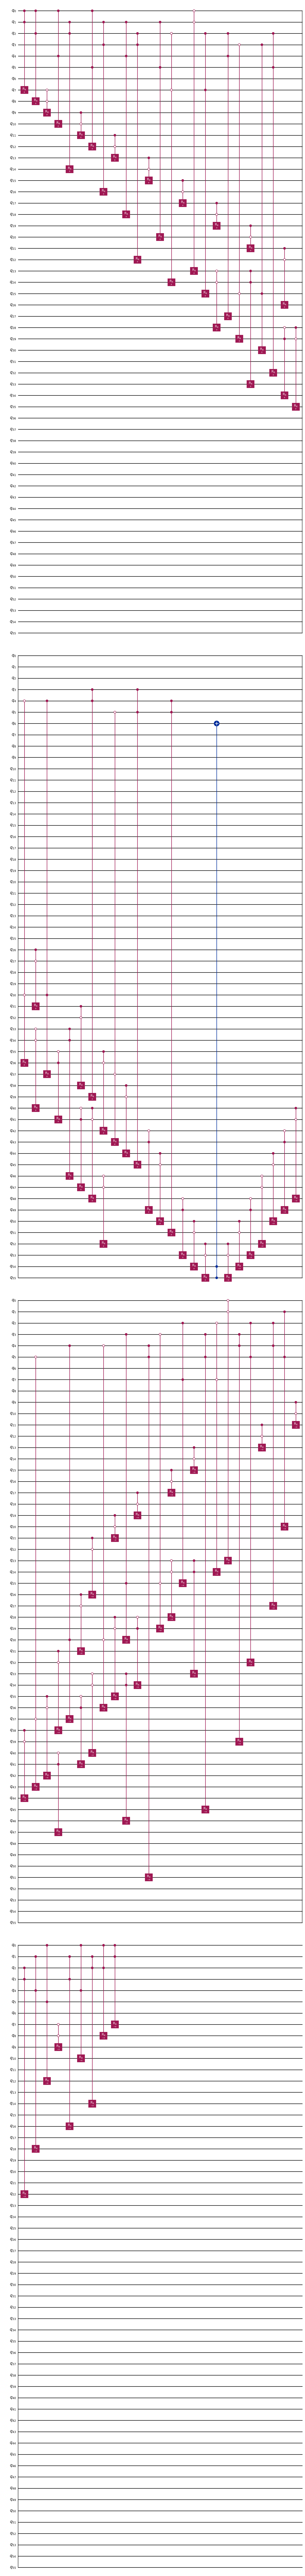

In [12]:
# Run the generated source through Tweedledum
from tweedledum.synthesis import xag_synth, xag_cleanup
from tweedledum.bool_function_compiler import BoolFunction
from tweedledum.classical import optimize
from tweedledum.passes import parity_decomp, linear_resynth
import tweedledum as td

synthesizer = BoolFunctionTester(src)

#synthesizer = BoolFunction(src)
#tt = synthesizer._truth_table
#print(tt[0])

# cleanup dangling nodes (if any)
xag = xag_cleanup(synthesizer.logic_network())
#optimize(xag)


# synthesize from network
circ = xag_synth(xag)
#circ = parity_decomp(circ)
#circ = linear_resynth(circ)

# convert to qiskit
oracle = td.converters.to_qiskit(circ, "gatelist")

oracle.draw("mpl")

NameError: name 'data' is not defined

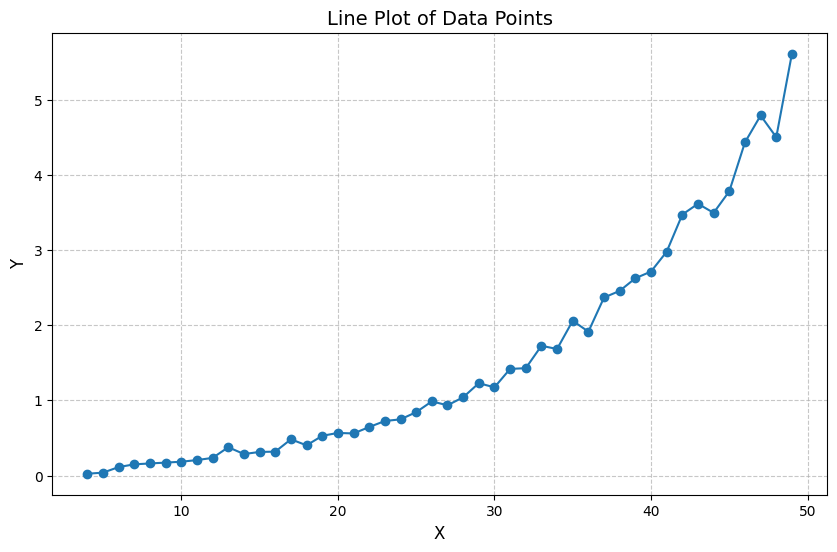

In [10]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(list(times.keys()), list(times.values()), marker='o')

# Customize the plot
plt.title('Line Plot of Data Points', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add data point labels
for x, y in data.items():
    plt.annotate(f'({x}, {y:.3f})', 
                 (x, y), 
                 xytext=(5, 5), 
                 textcoords='offset points',
                 fontsize=8)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

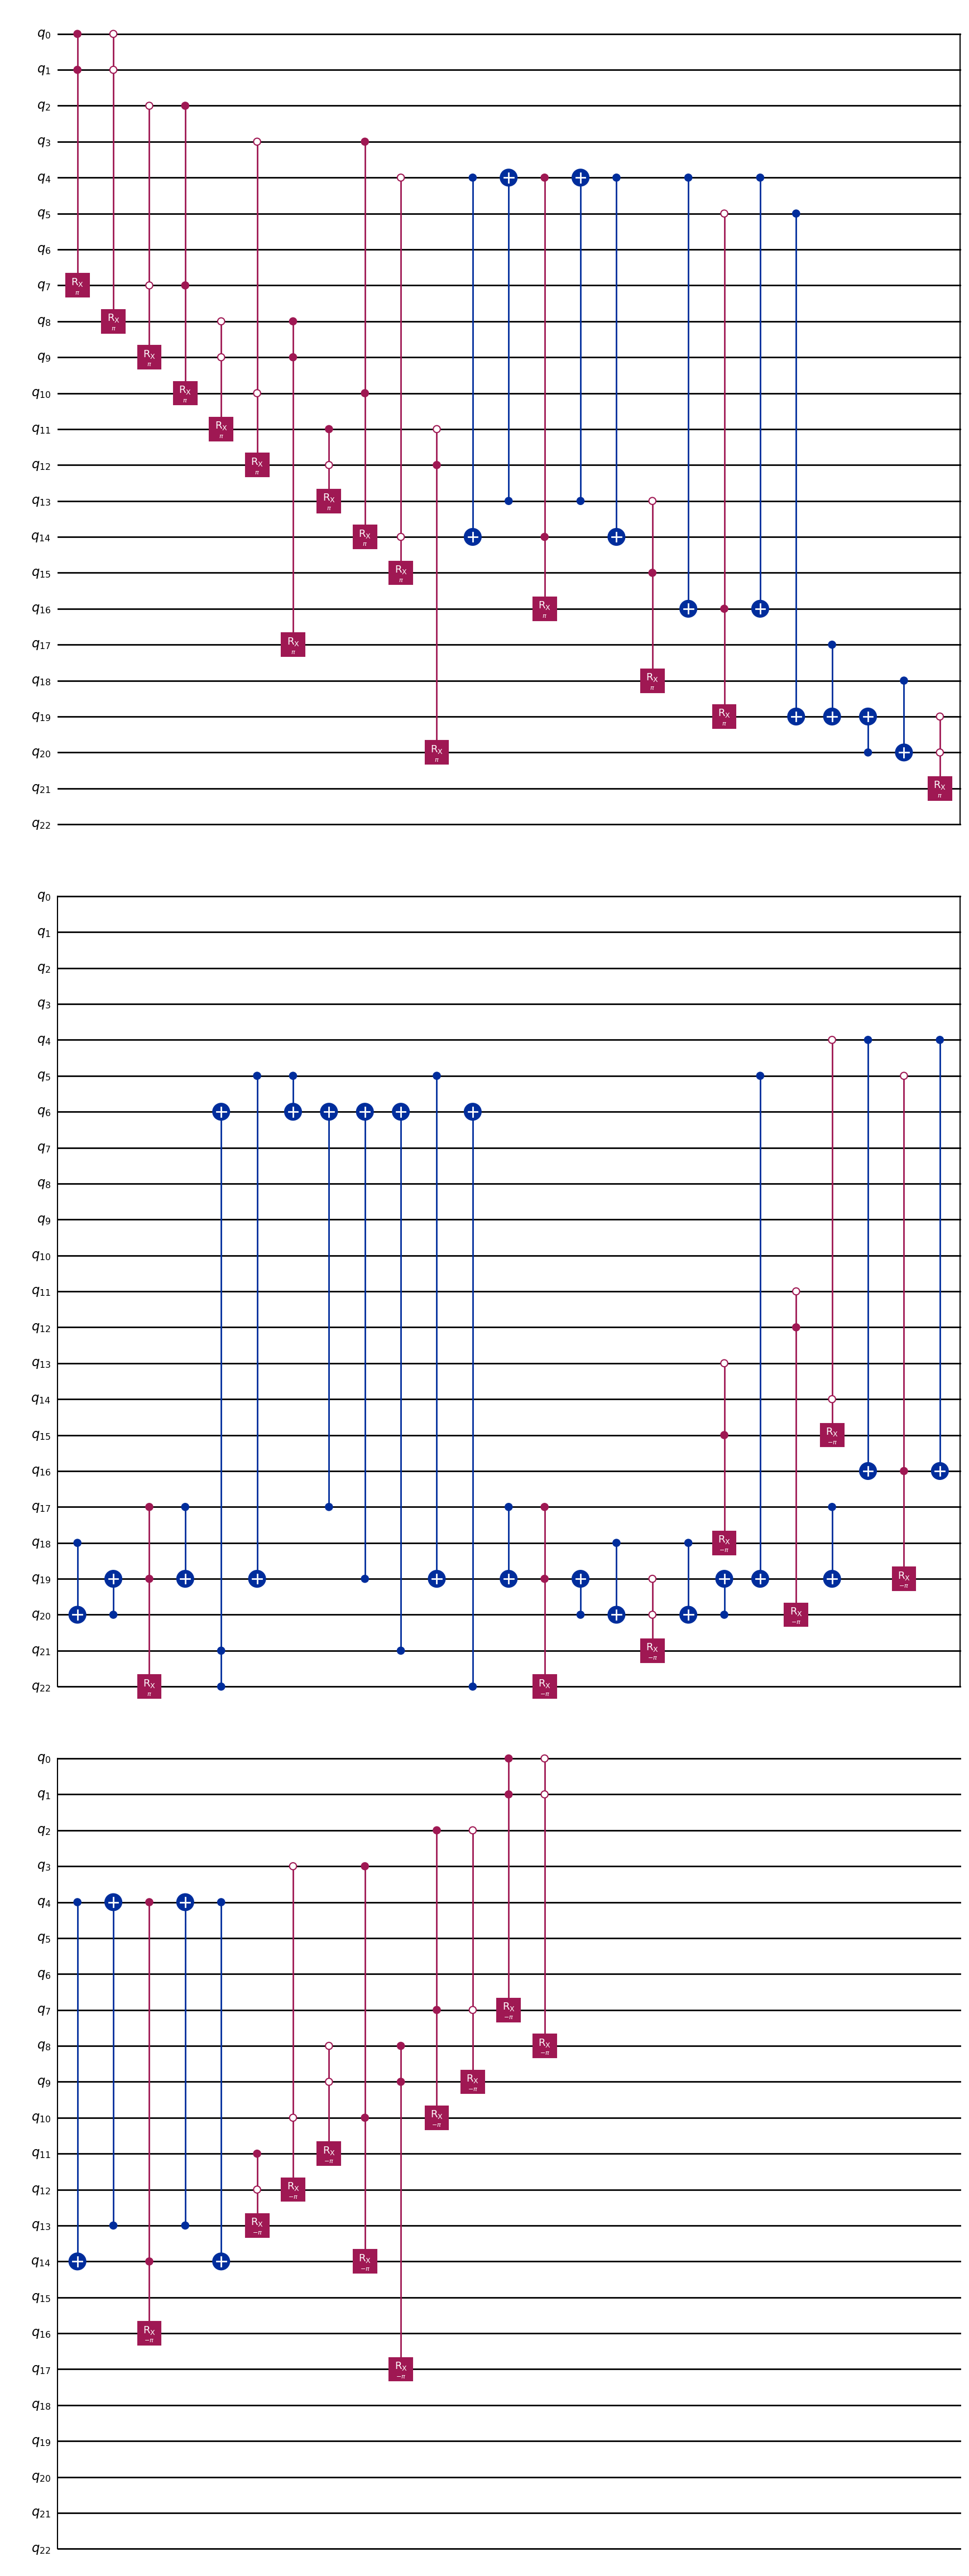

In [31]:
from tweedledum import BitVec

def sorting_circuit(vertices: BitVec(6)) -> BitVec(1):
    s_1_1_high = vertices[0] | vertices[1]
    s_1_1_low = vertices[0] & vertices[1]
    s_2_1_high = s_1_1_low | vertices[2]
    s_2_1_low = s_1_1_low & vertices[2]
    s_2_2_high = s_1_1_high | s_2_1_high
    s_2_2_low = s_1_1_high & s_2_1_high
    s_3_1_high = s_2_1_low | vertices[3]
    s_3_1_low = s_2_1_low & vertices[3]
    s_3_2_high = s_2_2_low | s_3_1_high
    s_3_2_low = s_2_2_low & s_3_1_high
    s_3_3_high = s_2_2_high | s_3_2_high
    s_3_3_low = s_2_2_high & s_3_2_high
    s_4_1_high = s_3_1_low | vertices[4]
    s_4_1_low = s_3_1_low & vertices[4]
    s_4_2_high = s_3_2_low | s_4_1_high
    s_4_2_low = s_3_2_low & s_4_1_high
    s_4_3_high = s_3_3_low | s_4_2_high
    s_4_3_low = s_3_3_low & s_4_2_high
    s_4_4_high = s_3_3_high | s_4_3_high
    s_4_4_low = s_3_3_high & s_4_3_high
    s_5_1_high = s_4_1_low | vertices[5]
    s_5_1_low = s_4_1_low & vertices[5]
    s_5_2_high = s_4_2_low | s_5_1_high
    s_5_2_low = s_4_2_low & s_5_1_high
    s_5_3_high = s_4_3_low | s_5_2_high
    s_5_3_low = s_4_3_low & s_5_2_high
    s_5_4_high = s_4_4_low | s_5_3_high
    s_5_4_low = s_4_4_low & s_5_3_high
    s_5_5_high = s_4_4_high | s_5_4_high
    s_5_5_low = s_4_4_high & s_5_4_high
    return s_5_4_low

synthesizer = BoolFunction(sorting_circuit)
# cleanup dangling nodes (if any)
xag = xag_cleanup(synthesizer.logic_network())
optimize(xag)


# synthesize from network
circ = xag_synth(xag)
circ = parity_decomp(circ)
circ = linear_resynth(circ)

# convert to qiskit
oracle = td.converters.to_qiskit(circ, "gatelist")

oracle.draw("mpl")

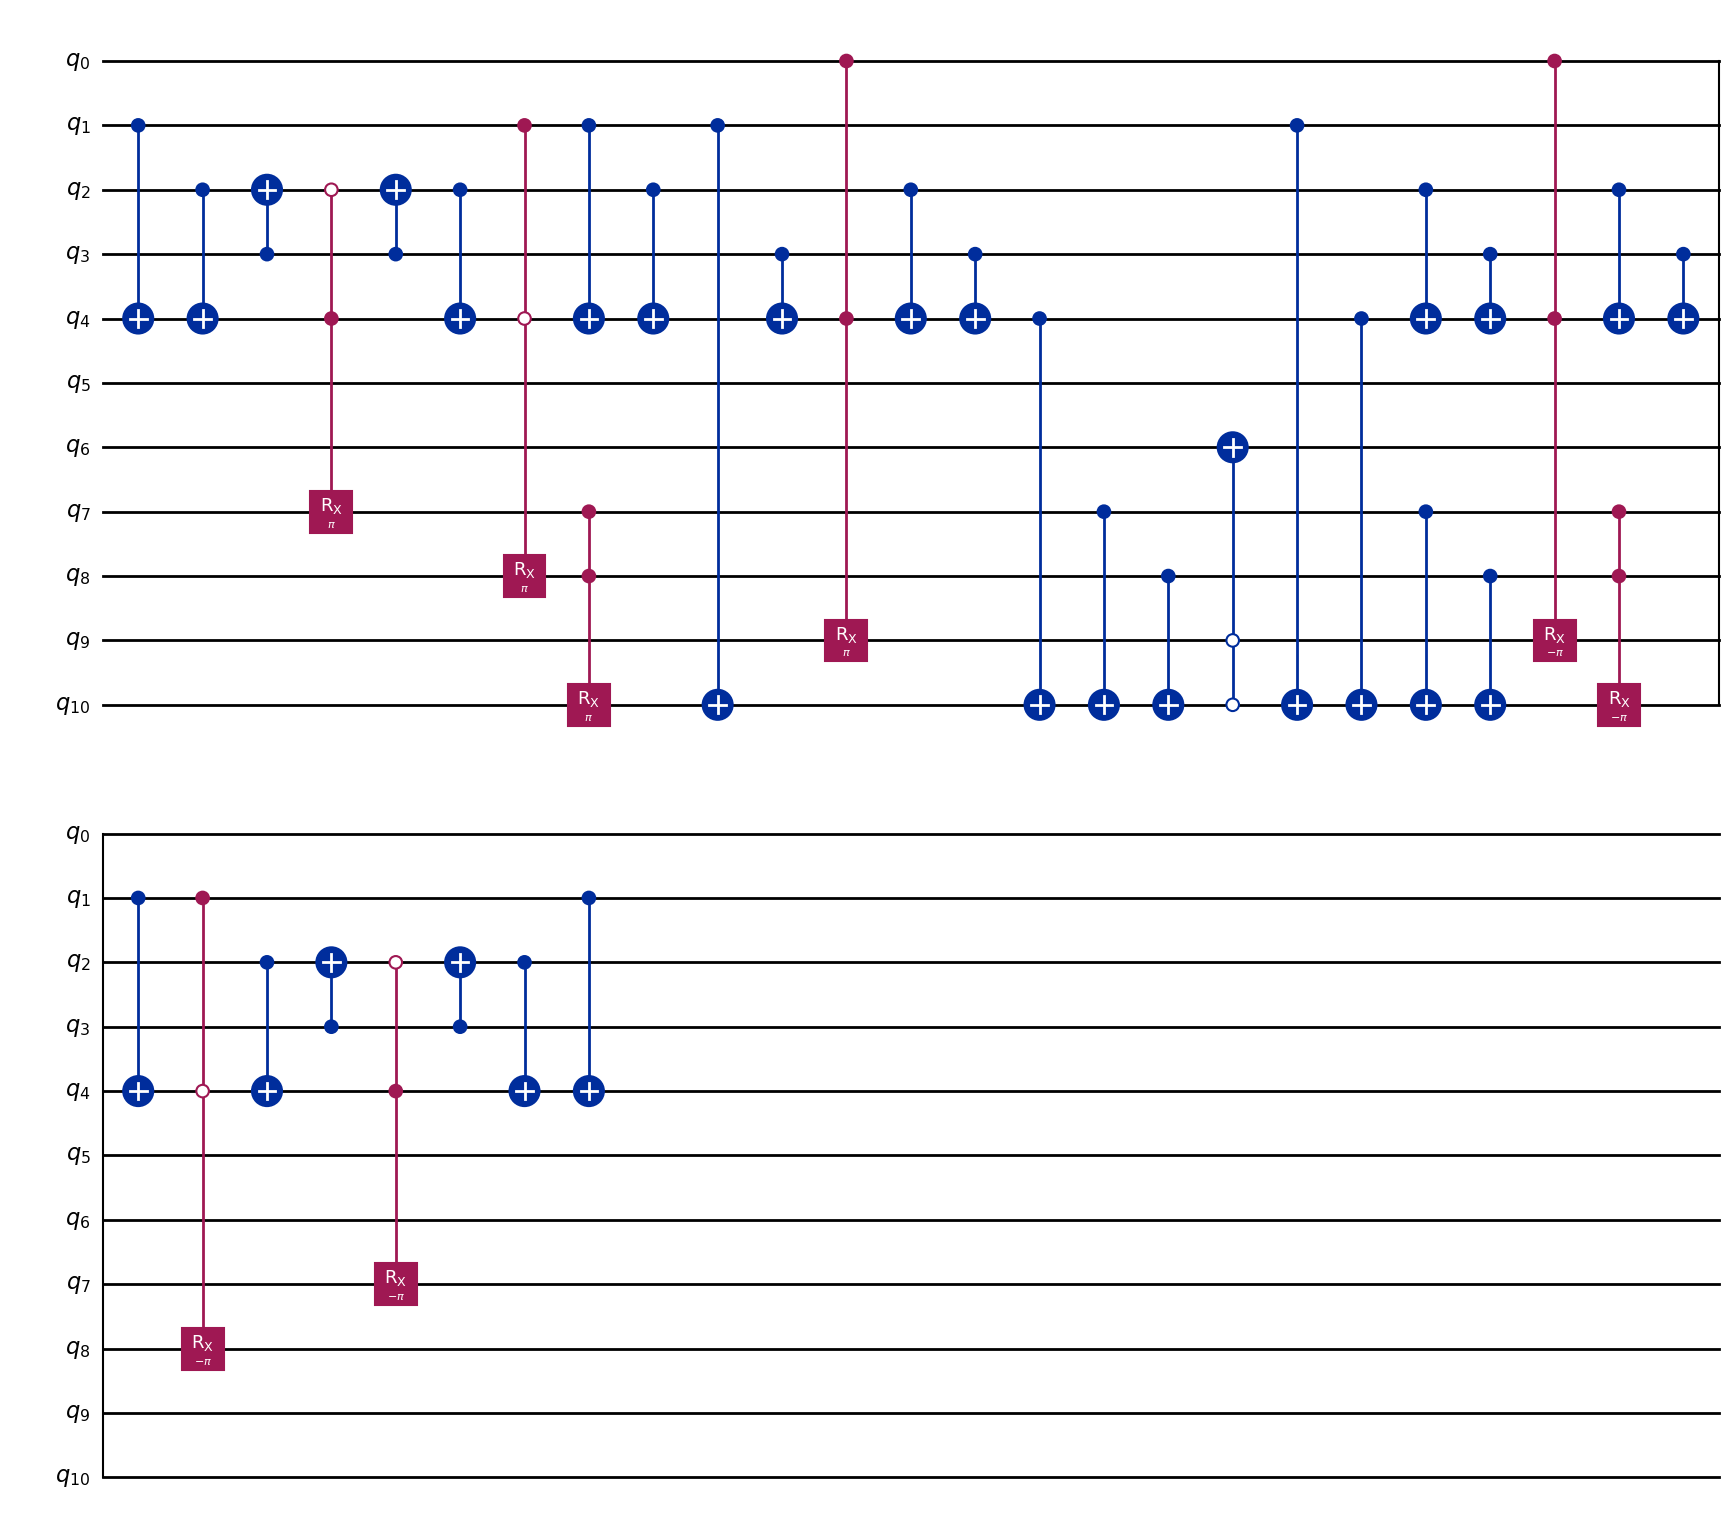

In [32]:
def vertex_counter(vertices: BitVec(6, '000000')) -> BitVec(1):
    """Counts cliques of size 2 in a graph specified by the edge list."""
    s = BitVec(1, 1)
    s = s & ~(vertices[0] & vertices[2])
    s = s & ~(vertices[0] & vertices[3])
    s = s & ~(vertices[0] & vertices[4])
    s = s & ~(vertices[1] & vertices[2])
    s = s & ~(vertices[1] & vertices[3])
    s = s & ~(vertices[1] & vertices[4])
    s = s & ~(vertices[2] & vertices[3])
    s = s & ~(vertices[2] & vertices[4])
    s = s & ~(vertices[3] & vertices[4])
    return s

synthesizer = BoolFunction(vertex_counter)
# cleanup dangling nodes (if any)
xag = xag_cleanup(synthesizer.logic_network())
optimize(xag)


# synthesize from network
circ = xag_synth(xag)
circ = parity_decomp(circ)
circ = linear_resynth(circ)

# convert to qiskit
oracle = td.converters.to_qiskit(circ, "gatelist")

oracle.draw("mpl")